##### Sergio Duque Mejía, c.c 1036654435
##### Mail: sergio.duquem@udea.edu.co

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 

import mplhep # Change Graph Style /// comment it if you dont have mplhep
plt.style.use(mplhep.style.CMS) #  CMS/CERN Style graphs /// comment it if you dont have mplhep

In [26]:
data = pd.read_csv("data.csv",header=None)

X_data = data[0]
y_data = data[1]

In [27]:
theta_1 = 10     # initial values of   
theta_0 = 10     # y=theta_1*x + theta_0  
alpha = 0.0001   # The learning Rate  
epochs = 100     # The number of iterations

## Gradiend Descent and other functions

In [28]:

def get_gradient_mb(x, y, m, b,learning_rate):
    N = len(x)
    diff1 = 0
    diff2 = 0

    for i in range(len(x)):
        diff1 += (y[i] - (m*x[i] + b)) # obteining the diff in J_1
    for i in range(len(x)):
        diff2 += x[i] * (y[i] - (m*x[i] + b)) # obteining the diff in J_2

    b_gradient = -(2/N) * diff1 # obteining the slope
    m_gradient = -(2/N) * diff2 # obteining the intercept

    b -= (learning_rate * b_gradient) # Update the slope
    m -= (learning_rate * m_gradient) # Update the intercept

    return m,b

def gradient_descent(x, y, learning_rate, num_iterations):
  b = 10 # initial value
  m = 10 # initial value
  MSE = [] 
  MAE = []
  MAPE = []
  iterations = []
  for i in range(num_iterations):
    iterations.append(i)
    m, b = get_gradient_mb(x, y, m, b, learning_rate) # obteining the slope and intercept
    MSE.append((1/len(y))*sum((y-(m*x+b))**2)) # obteining the MSE
    MAE.append((1/len(y))*sum(np.abs(y-(m*x+b)))) # obteining the MAE
    MAPE.append((100/len(y))*sum(np.abs(((y-(m*x+b))/(y))))) # obteining the MAPE

  return m,b,MSE,MAE,MAPE,iterations

def func(x,m,b): # Line Function
  return m*x + b

def graph(func,xdata,ydata,m1,m2,b1,b2,N,MSE,MAE,MAPE):
  xdata_sort = np.sort(xdata.unique()) # take unique elements and sort them
  fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(15,10), constrained_layout=True) # make 2x2 plot

  ax1.scatter(xdata,ydata,alpha=0.5) # data 
  ax1.plot(xdata_sort,func(xdata_sort,m1,b1), color="red",linestyle="--" ) # using Gradient Descent
  ax1.plot(xdata_sort,func(xdata_sort,m2,b2), color="green",linestyle="-" ) # using Scipy
  ax1.legend(["fitting using GD", "fitting using Scipy","data"],fontsize=15) # legend
  ax1.set_title("Data fitting") # title
  ax1.set_xlabel("x data") # xlabel 
  ax1.set_ylabel("y data") # ylabel
  ax1.tick_params(labelsize=15) # size of ticks
  ax1.grid() # grid in plot

  ax2.plot(N,MSE,'.',label="MSE")  # iterations vs MSE
  ax2.set_title("MSE vs iterations") # title
  ax2.set_ylabel("MSE data") # MSE
  ax2.set_xlabel("iterations") # iterations
  ax2.tick_params(labelsize=15) # size of ticks
  ax2.legend(["MSE"]) # legend
  ax2.grid() # grid in plot

  ax3.plot(N,MAE,'.') # iterations vs MAE
  ax3.set_title("MAE vs iterations")
  ax3.set_ylabel("MAE data")
  ax3.set_xlabel("iterations")
  ax3.tick_params(labelsize=15)
  ax3.legend(["MAE"])
  ax3.grid()

  ax4.plot(N,MAPE,".") # iterations vs MAPE
  ax4.set_title("MAPE vs iterations")
  ax4.set_ylabel("MAPE data")
  ax4.set_xlabel("iterations")
  ax4.tick_params(labelsize=15)
  ax4.legend(["MAPE"])
  ax4.grid()

  plt.show()
  

### Using gradient_descent funcion with the problem data

In [29]:
m1,b1,MSE,MAE,MAPE,N = gradient_descent(data[0],data[1],alpha,epochs)
print([m1,b1])

[1.2863385636740872, 9.827348562473464]


### Using fit by Scipy with the problem data

In [31]:
popt,pcov = curve_fit(func,X_data,y_data,p0=[theta_1,theta_0])
m2 = popt[0]
b2 = popt[1]
print([m2,b2])

[1.3224310239237007, 7.991020921164858]


## Graph with alpha=0.0001 

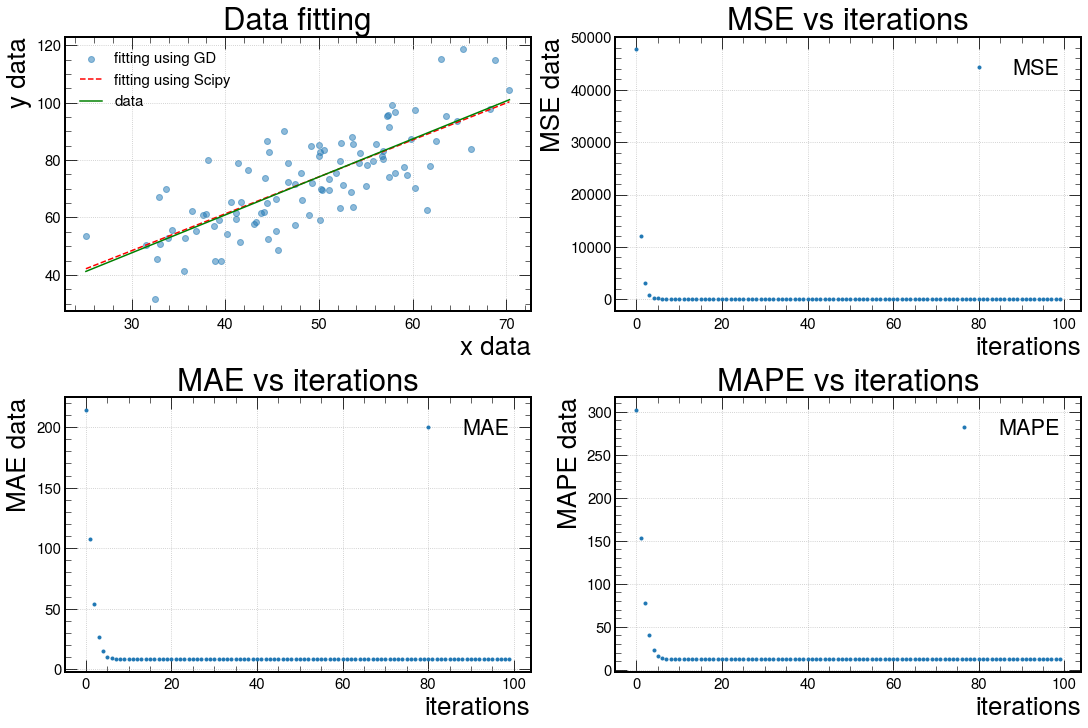

In [7]:
graph(func,X_data,y_data,m1,m2,b1,b2,N,MSE,MAE,MAPE)

### Changing alpha=0.0007

In [12]:
m1_,b1_,MSE,MAE,MAPE,N = gradient_descent(data[0],data[1],0.0007,epochs)
print([m1_,b1_])

[3.446130400348636e+40, 6.7732643023069835e+38]


## Graph with alpha=0.0007

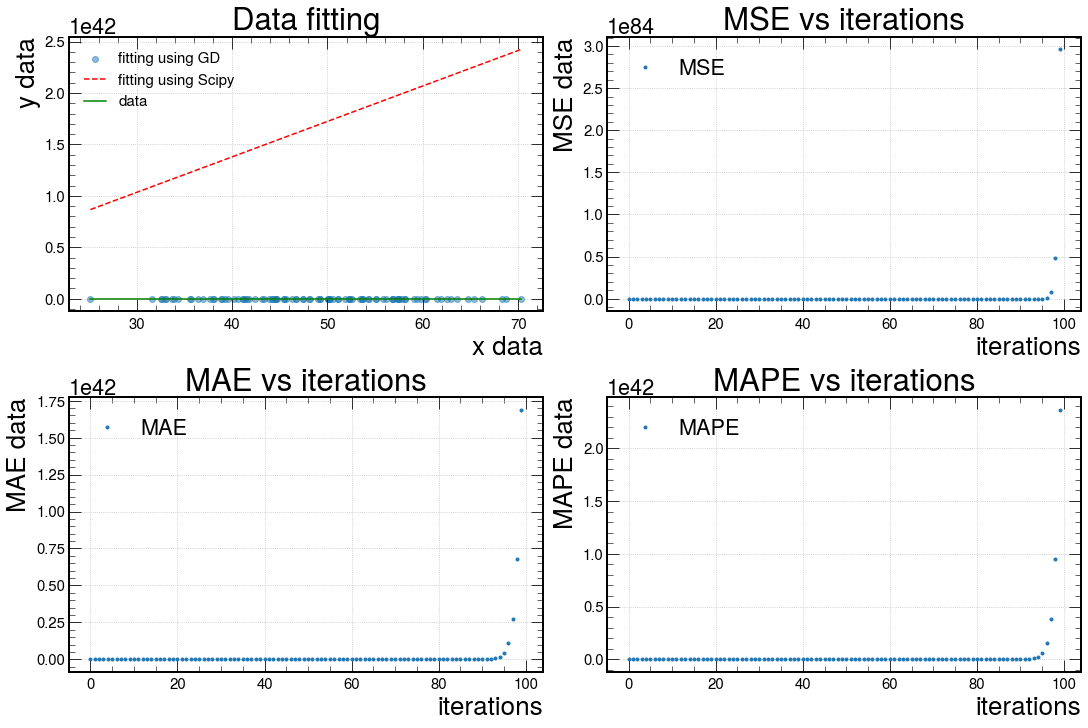

In [13]:
graph(func,X_data,y_data,m1_,m2,b1_,b2,N,MSE,MAE,MAPE)

In [32]:
# MH comments
# I dont understand why scipy fit give you so much different results
# I get from scipy: m=1.29, b=9.91 (which is close to your gradient descent)
# can you please check this